# ABHISHEK BHANDWALKAR_DS_INTERNSHIP_OIBSIP

# TASK _ 03

# SALES PREDICTION USING PYTHON

In [87]:
import os


In [84]:
import xgboost

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [86]:
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
data.shape

(200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [16]:
data['TV'].mean()

147.0425

In [19]:
data['TV'].fillna(data['TV'].mean(), inplace=True)

In [22]:
missing_values = data['TV'].isnull()

In [23]:
print(missing_values)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: TV, Length: 200, dtype: bool


In [24]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [26]:
sb.set()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

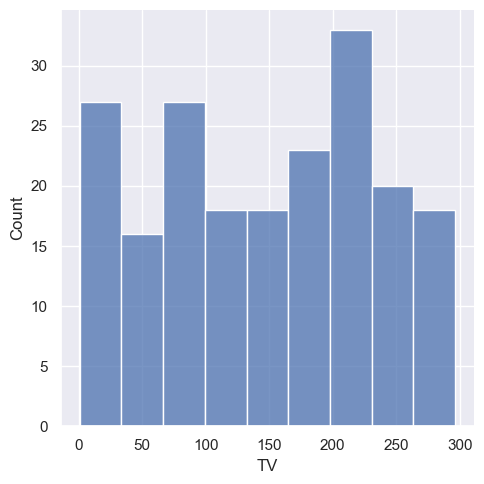

In [34]:
plt.figure(figsize= (10,10))
sb.displot(data['TV'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

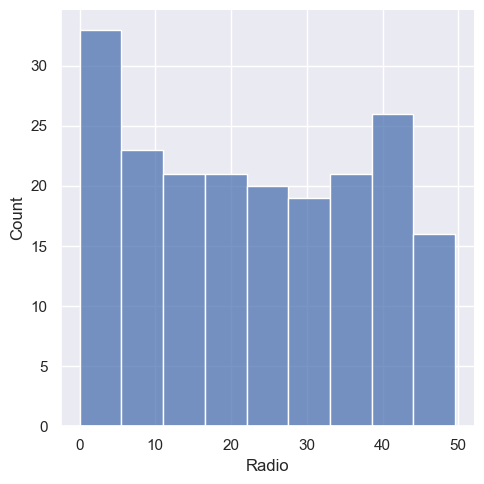

In [35]:
plt.figure(figsize= (10,10))
sb.displot(data['Radio'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

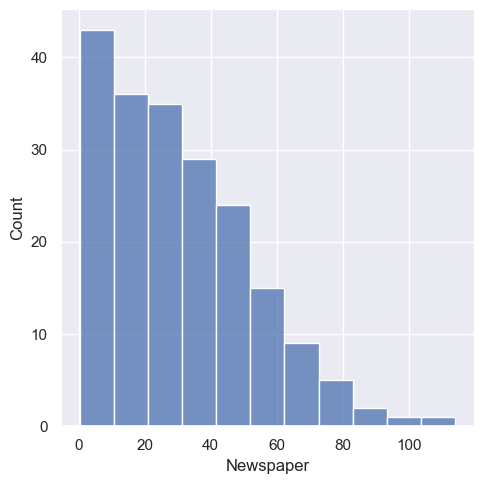

In [36]:
plt.figure(figsize= (10,10))
sb.displot(data['Newspaper'])
plt.show

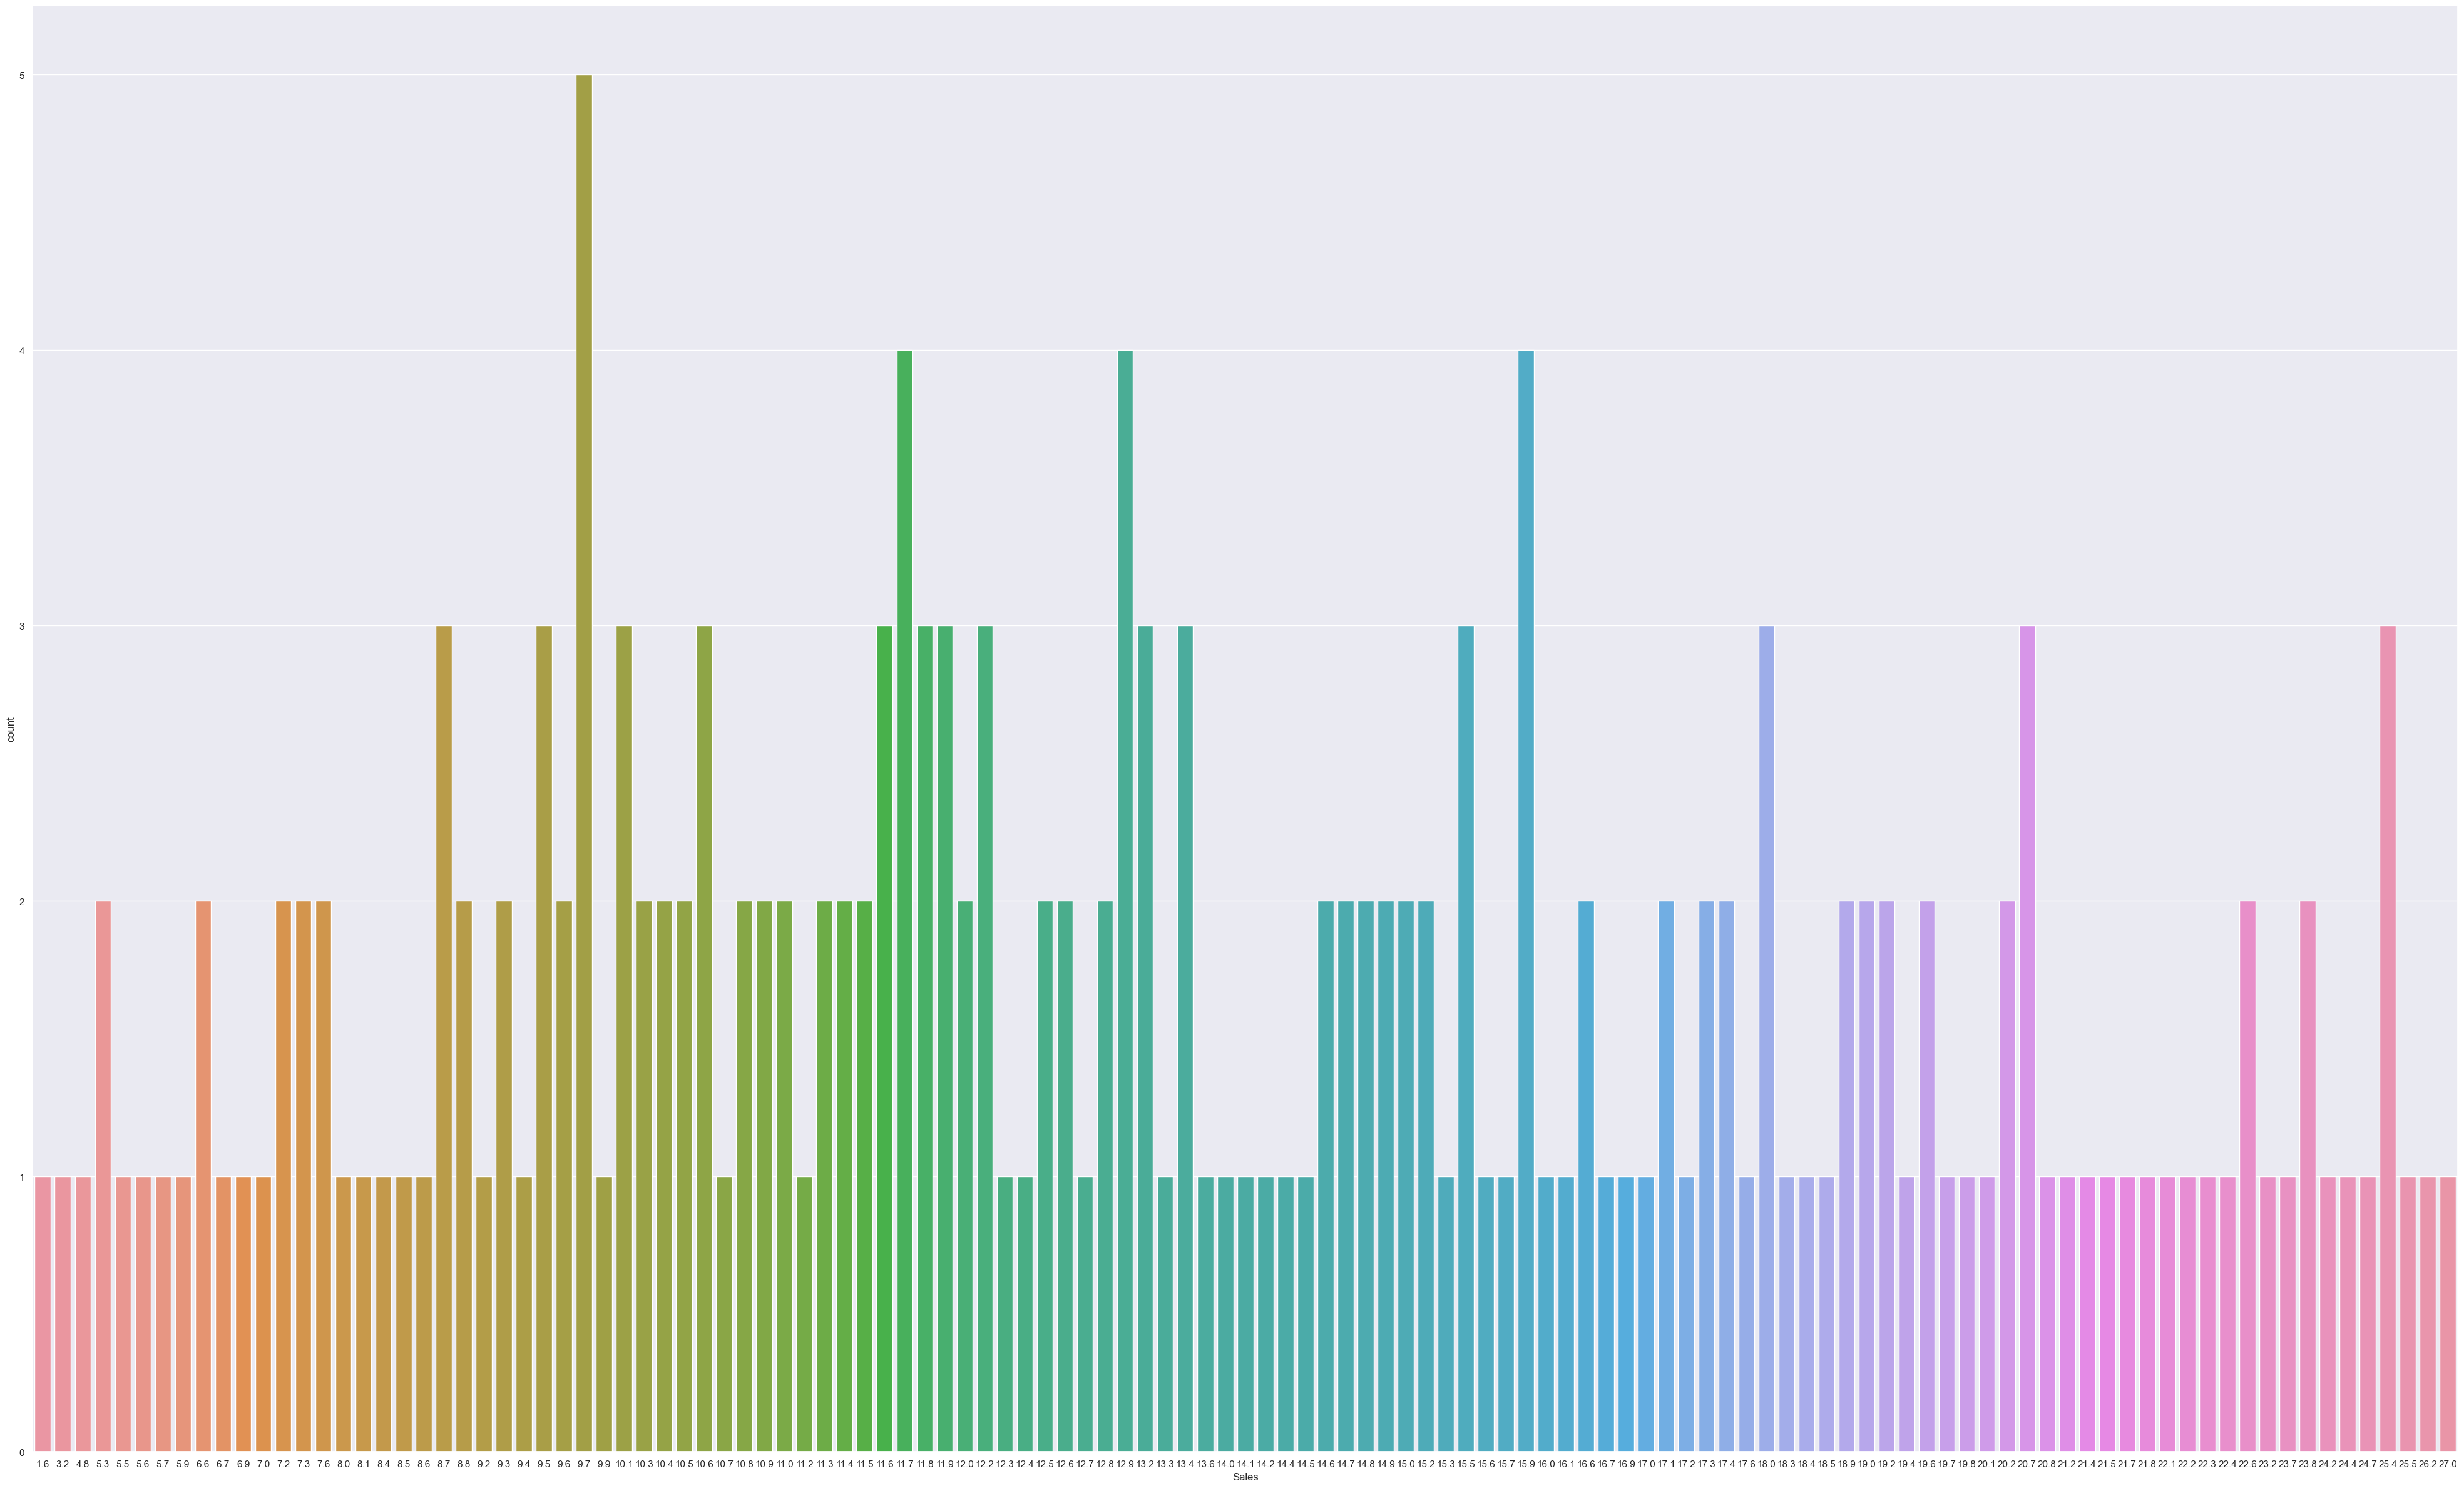

In [47]:
plt.figure(figsize= (50,30))
sb.countplot(x='Sales', data=data)
plt.show()

In [52]:
data['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [57]:
encoder = LabelEncoder()

In [60]:
data['TV'] = encoder.fit_transform(data['TV'])

data['Radio'] = encoder.fit_transform(data['Radio'])

data['Newspaper'] = encoder.fit_transform(data['Newspaper'])

data['Sales'] = encoder.fit_transform(data['Sales'])

In [61]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,153,131,159,106
1,2,32,136,124,31
2,3,12,156,160,23
3,4,98,142,149,89
4,5,112,41,148,54


In [62]:
x = data.drop(columns='TV',axis=1)
y = data['TV']

In [63]:
print(x)

     Unnamed: 0  Radio  Newspaper  Sales
0             1    131        159    106
1             2    136        124     31
2             3    156        160     23
3             4    142        149     89
4             5     41        148     54
..          ...    ...        ...    ...
195         196     18         44     14
196         197     21         23     27
197         198     35         20     53
198         199    145        158    118
199         200     34         27     57

[200 rows x 4 columns]


In [64]:
print(y)

0      153
1       32
2       12
3       98
4      112
      ... 
195     28
196     63
197    111
198    181
199    154
Name: TV, Length: 200, dtype: int64


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [68]:
print(x.shape, x_train.shape, x_test.shape)

(200, 4) (160, 4) (40, 4)


## TRAINING MACHINE LEARNING MODEL

In [71]:
regressor = XGBRegressor()

In [72]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## TRAINING DATA

In [77]:
train_prediction = regressor.predict(x_train)

In [78]:
r2_train = metrics.r2_score(y_train, train_prediction)

In [79]:
print('R Squared Value : ', r2_train)

R Squared Value :  0.9999999917449361


## TESTING DATA

In [80]:
test_prediction = regressor.predict(x_test)

In [82]:
r2_test = metrics.r2_score(y_test, test_prediction)

In [83]:
print('R Squared Value : ', r2_test)

R Squared Value :  0.8979537982248589
